In [13]:
# Library imports
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn import metrics


In [14]:
# Dataset retrieval
dataUrl='https://raw.githubusercontent.com/CodeStation5/Vehicle-Accident-ML/main/dataset/accident_data_CSV.csv'
# Local file -> dataUrl=("dataset/accident_data_CSV.csv")
reader=pd.read_csv(dataUrl)
# Set color themes
list(colormaps)
sns.set_theme(style="darkgrid")

In [15]:
# Print the dataset
print("Here is a summary of the dataset used")
display(reader)

Here is a summary of the dataset used


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [16]:
# Print data in charts
print("Here is the data in bar charts to showcase how vehicle accident data differs based on factors such as the month and year")

Here is the data in bar charts to showcase how vehicle accident data differs based on factors such as the month and year


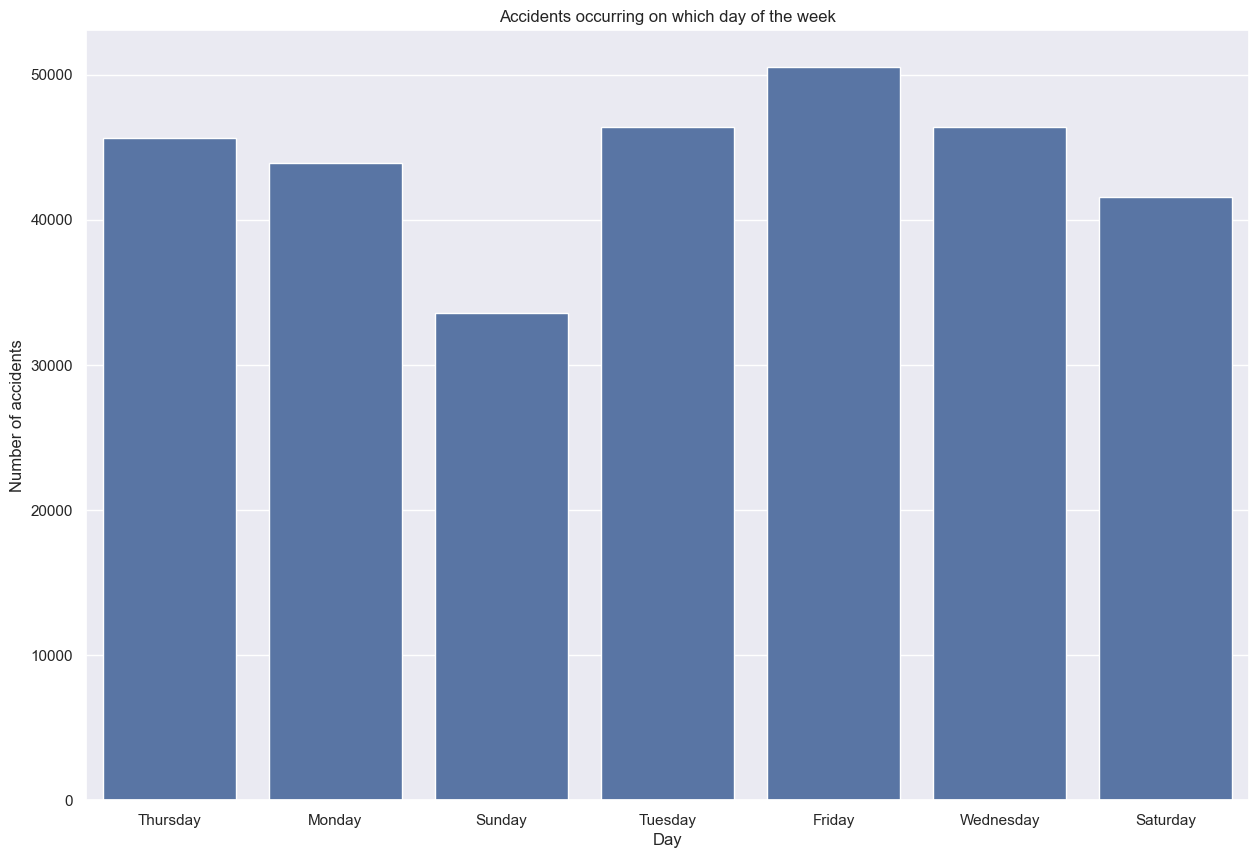

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Day_of_Week', data=reader)
plt.title('Accidents occurring on which day of the week')
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.show()


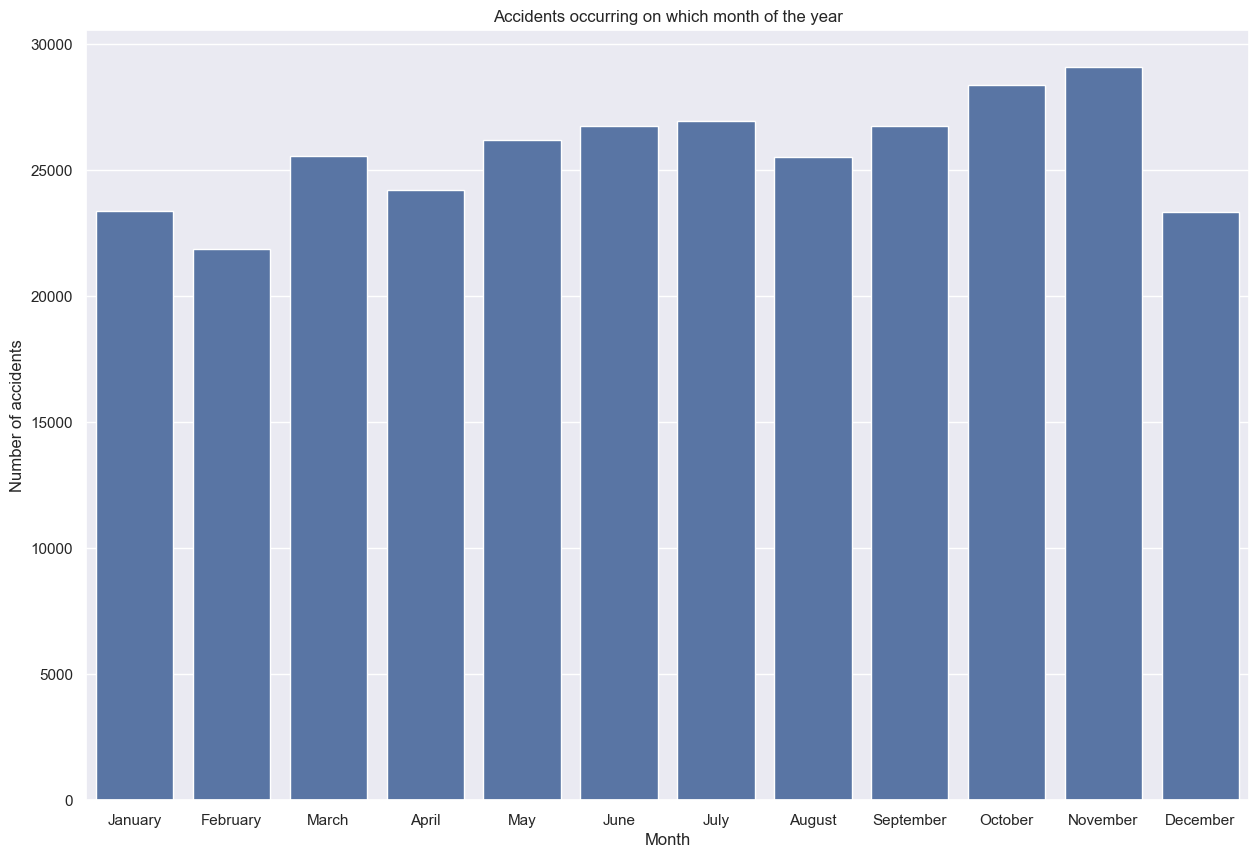

In [18]:
reader['Accident Date'] = pd.to_datetime(reader['Accident Date'], format='%m/%d/%Y')
reader['Month'] = reader['Accident Date'].dt.month_name()
plt.figure(figsize=(15, 10))
sns.countplot(x='Month', data=reader, order=
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Accidents occurring on which month of the year')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.show()


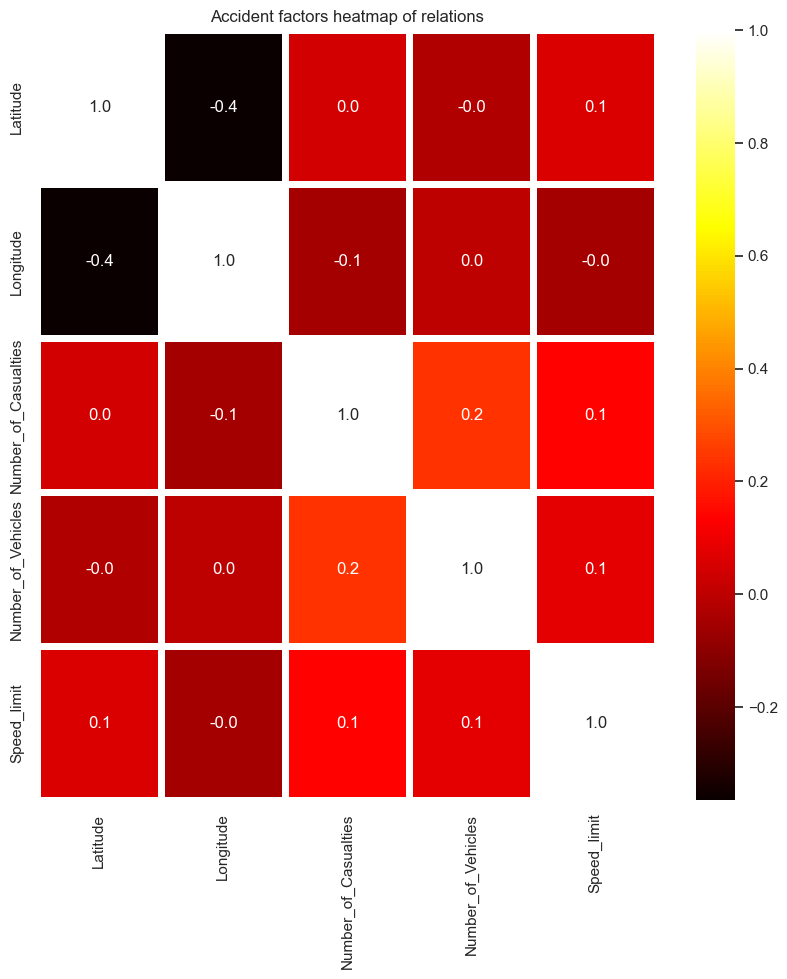

In [19]:
# Heatmap of the factors involved in accidents and how they relate to each other
plt.figure(figsize=(10, 10))
heatmap = reader.corr(numeric_only=True)  
sns.heatmap(heatmap, cmap="hot", annot=True, fmt='.1f', linewidths=5)
plt.title('Accident factors heatmap of relations')
plt.show()

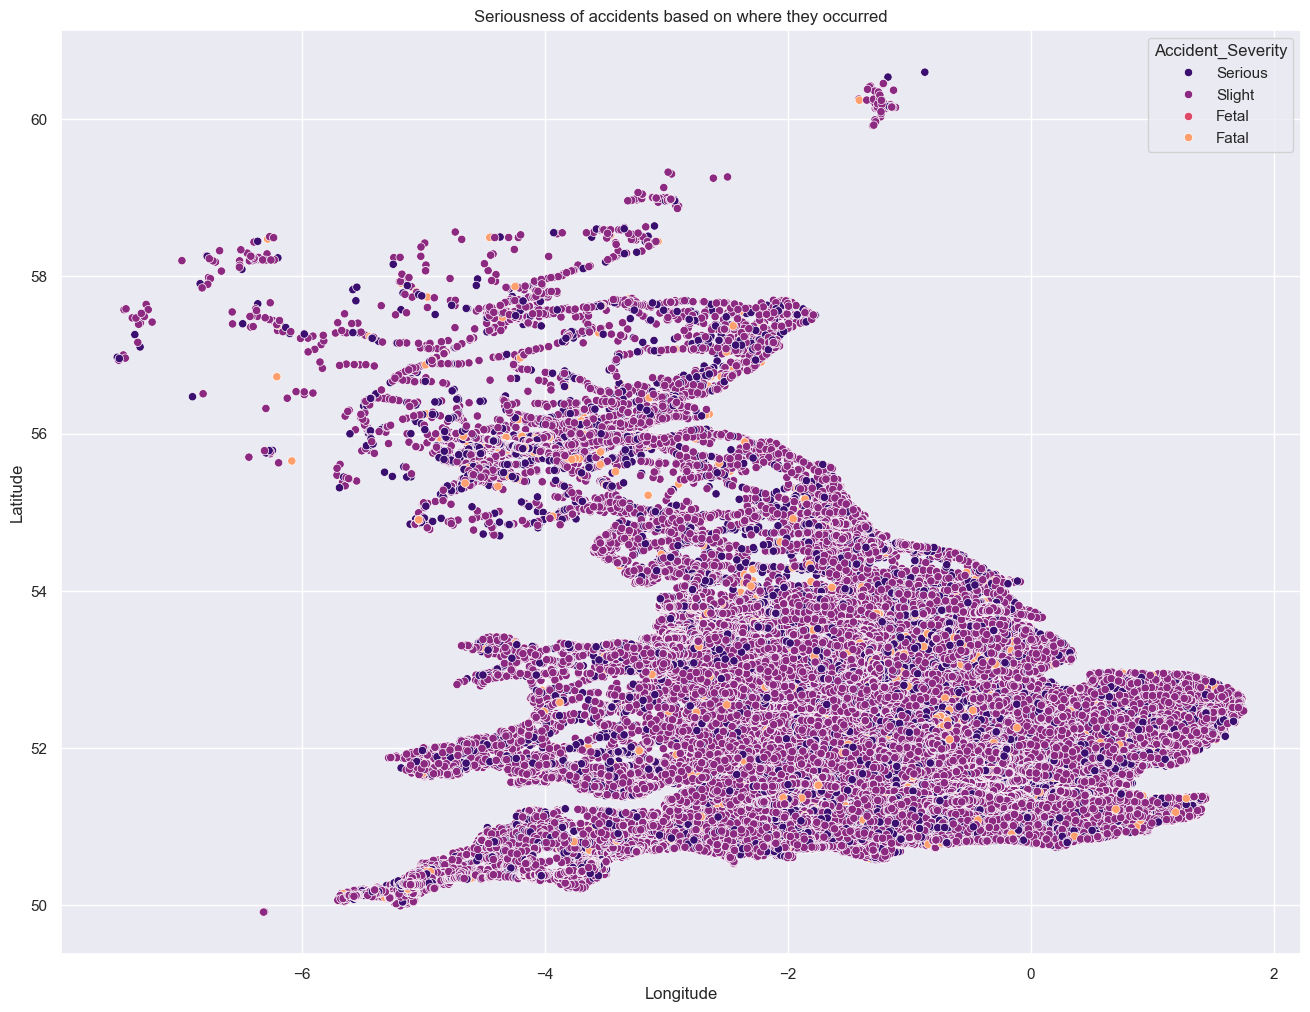

In [20]:
# Scatterplot of how the area the accident occurs relates to how serious the accident was
plt.figure(figsize=(16, 12))
sns.scatterplot(data=reader, palette='magma', hue='Accident_Severity', alpha=1, x='Longitude', y='Latitude')
plt.title('Seriousness of accidents based on where they occurred')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [36]:
# Creates interactive sliders
temps = widgets.IntSlider(description='Temperature',min=1,max=100,step=1)
vehicles_inv = widgets.IntSlider(description='Vehicles',min=1,max=10,step=1)
latDist= widgets.IntSlider(description='Longitude',min=1,max=100,step=1)
longDist = widgets.IntSlider(description='Latitude',min=1,max=100,step=1)
passengers = widgets.IntSlider(description='Passengers',min=1,max=10,step=1)

# Put the sliders into a box
sliders = widgets.VBox([temps, vehicles_inv, latDist, longDist, passengers])
displaySlider = widgets.Tab()
displaySlider.children = [sliders]
displaySlider.set_title(0, 'Input details to predict an accident')

#Display slider message
print("Please input the following details to predict the chance of an accident occurring")
# Display the interactive slider
displaySlider

Please input the following details to predict the chance of an accident occurring


In [63]:
#Calculate the chance of an accident occurring given the user input
total = int(temps.value) * 0.0145 * int(vehicles_inv.value) * 0.024 * int(latDist.value) * 1 * int(longDist.value) * 1 * int(passengers.value) * 0.014 

# Display the results of user input
print("The chance of an accident occurring given your data in percentage is: ", round(total,2))
print("Note: Rerun the above cell to input new data")

The chance of an accident occuring given your data in percent is:  2.06
Note: Rerun the above cell to input new data
